In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = iris.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [11]:
df['flower_names'] = df.target.apply(lambda x:iris.target_names[x])

In [12]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

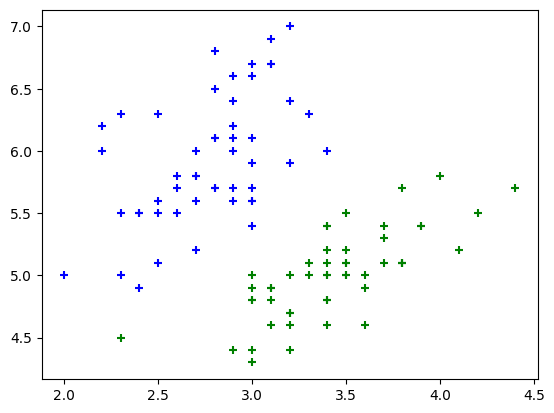

In [18]:
plt.scatter(df0['sepal width (cm)'],df0['sepal length (cm)'],color='green',marker='+')
plt.scatter(df1['sepal width (cm)'],df1['sepal length (cm)'],color='blue',marker='+')

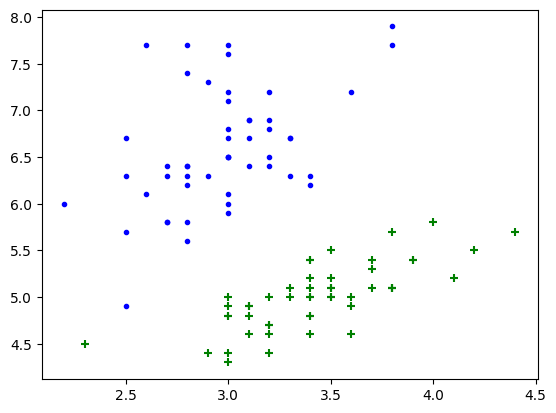

In [19]:
plt.scatter(df0['sepal width (cm)'],df0['sepal length (cm)'],color='green',marker='+')
plt.scatter(df2['sepal width (cm)'],df2['sepal length (cm)'],color='blue',marker='.')

In [27]:
x = df.drop(['target','flower_names'],axis=1)

In [28]:
y = df['target']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
model = RandomForestClassifier()

In [33]:
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [34]:
pred = model.predict(xtest)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(pred,ytest)

1.0

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
cm = confusion_matrix(pred,ytest)

In [39]:
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

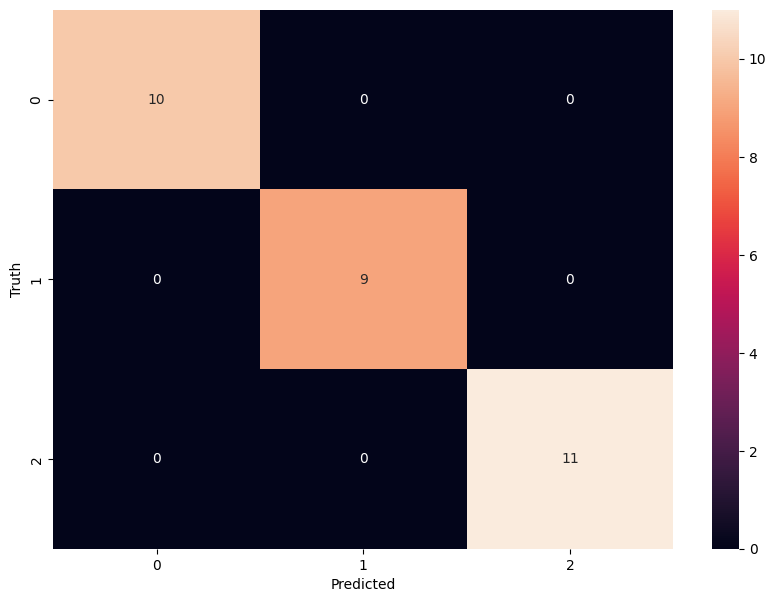

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')